<a href="https://colab.research.google.com/github/SirishaDuddukunta/Data-Analysis/blob/main/case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Import libraries

In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [27]:
from google.colab import drive

# Reading data

In [28]:
df = pd.read_csv('/content/spotify-2023 (1).csv', encoding='latin1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [29]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [30]:
df.shape

(953, 24)

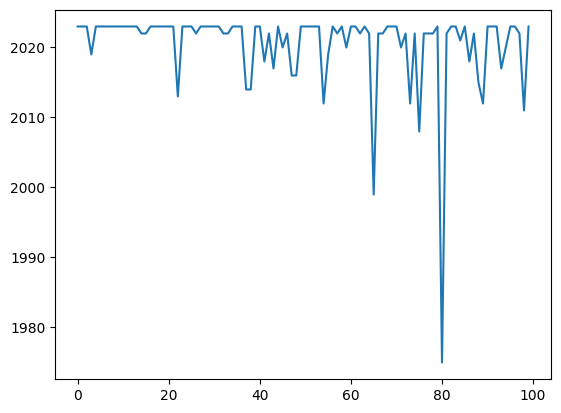

In [31]:
sample = df.head(100)
plt.plot(sample.index, sample['released_year'])

# Data Processing

In [32]:
df.rename(columns={'artist(s)_name':"artists_name"}, inplace=True)
df.rename(columns={'key':"song_key"}, inplace=True)
df.head()

,track_name,artists_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,song_key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [33]:
df.duplicated().any()

False

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            934 non-null    object
 1   artists_name          939 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  song_key              858 non-null    ob

In [35]:
df.isna().sum()

track_name              19
artists_name            14
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
song_key                95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [36]:
df = df.drop('in_shazam_charts', axis=1)

In [37]:
df['in_deezer_playlists'] = df['in_deezer_playlists'].apply(lambda val: str(val).replace(',',''))
df['song_key'] = df['song_key'].fillna('undefined')

In [38]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['song_key'] = df['song_key'].astype('category')
df['mode'] = df['mode'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   track_name            934 non-null    object  
 1   artists_name          939 non-null    object  
 2   artist_count          953 non-null    int64   
 3   released_year         953 non-null    int64   
 4   released_month        953 non-null    int64   
 5   released_day          953 non-null    int64   
 6   in_spotify_playlists  953 non-null    int64   
 7   in_spotify_charts     953 non-null    int64   
 8   streams               952 non-null    float64 
 9   in_apple_playlists    953 non-null    int64   
 10  in_apple_charts       953 non-null    int64   
 11  in_deezer_playlists   953 non-null    int64   
 12  in_deezer_charts      953 non-null    int64   
 13  bpm                   953 non-null    int64   
 14  song_key              953 non-null    category
 15  mode  

In [39]:
df = df.dropna()

In [40]:
df.isna().sum()

track_name              0
artists_name            0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
bpm                     0
song_key                0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

# Detection and Processing of Anomalies

Check the column artists_count."

<Axes: >

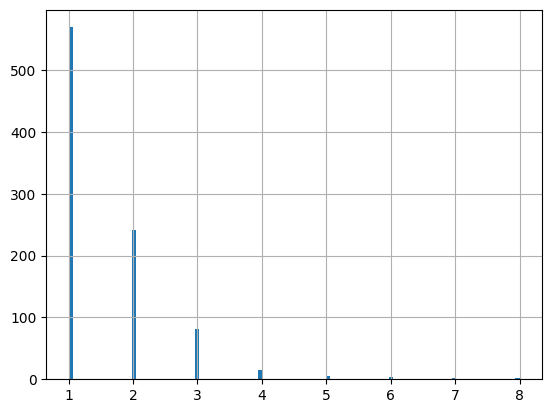

In [41]:
df['artist_count'].hist(bins=100)

<Axes: >

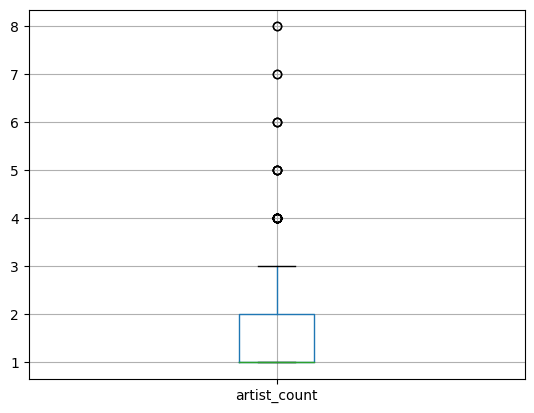

In [42]:
df.boxplot(column=['artist_count'])

In [43]:
df['artist_count'].describe()

count    919.000000
mean       1.556039
std        0.900777
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: artist_count, dtype: float64

Checking the released_year column

<Axes: >

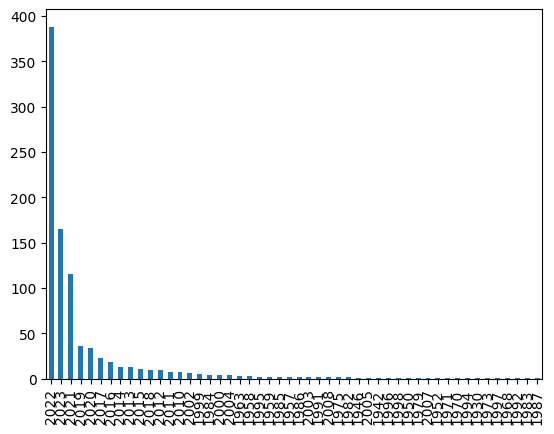

In [44]:
df['released_year'].value_counts().plot.bar()

Checking the column in_spotify_charts

In [45]:
df['in_spotify_charts'].value_counts()

0      393
4       46
2       40
6       35
3       17
      ... 
79       1
58       1
66       1
63       1
147      1
Name: in_spotify_charts, Length: 82, dtype: int64

Checking the column song_key

In [46]:
df['song_key'].value_counts()

C#           116
undefined     94
G             93
F             87
G#            86
D             78
B             77
A             74
F#            69
E             58
A#            54
D#            33
Name: song_key, dtype: int64

In [47]:
df['song_key'].describe()

count     919
unique     12
top        C#
freq      116
Name: song_key, dtype: object

<Axes: >

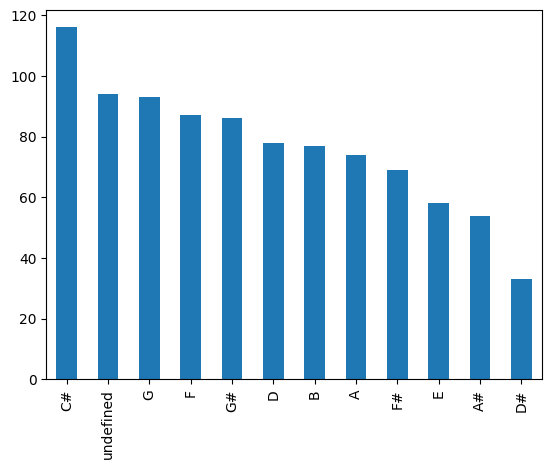

In [48]:
df['song_key'].value_counts().plot.bar()

Check the column danceability_%

In [49]:
df['danceability_%'].describe()

count    919.000000
mean      66.837867
std       14.642986
min       23.000000
25%       57.000000
50%       69.000000
75%       78.000000
max       96.000000
Name: danceability_%, dtype: float64

<Axes: >

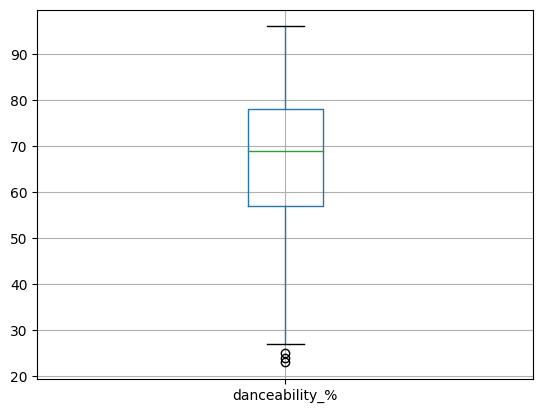

In [50]:
df.boxplot(column=['danceability_%'])

# Data visualization

Text(0, 0.5, 'Track Name')

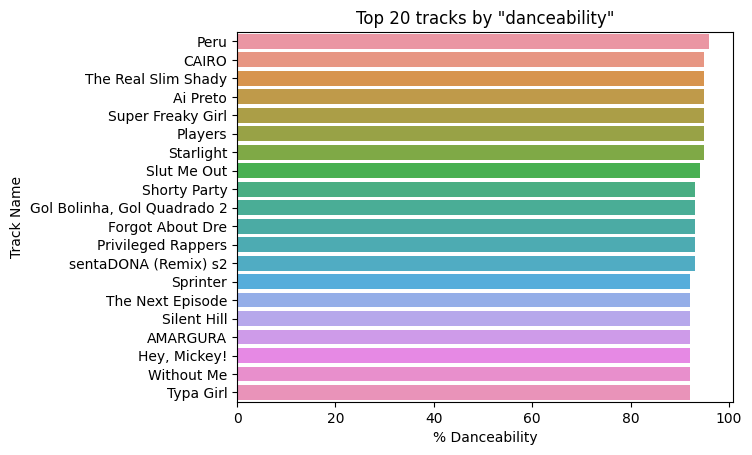

In [51]:
# Top 20 most danceable tracks
df_danceability_20 = df.sort_values(by='danceability_%', ascending=False).head(20)

plt.figure()

sns.barplot(x='danceability_%', y='track_name', data=df_danceability_20)
plt.title('Top 20 tracks by "danceability"')
plt.xlabel('% Danceability')
plt.ylabel('Track Name')

Text(0, 0.5, 'Track Name')

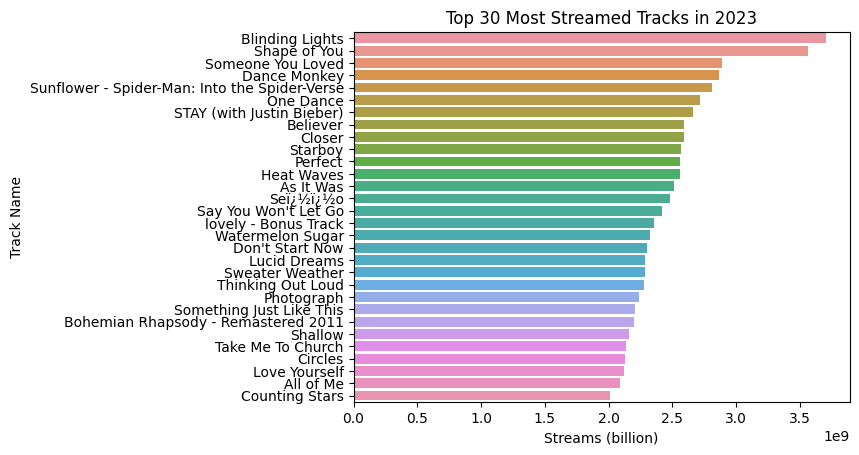

In [52]:
# Top 30 by streams
df_streaming = df.sort_values(by='streams', ascending=False).head(30)

plt.figure()

sns.barplot(x='streams', y='track_name', data=df_streaming)
plt.title('Top 30 Most Streamed Tracks in 2023')
plt.xlabel('Streams (billion)')
plt.ylabel('Track Name')

Text(0, 0.5, 'Number of Releases')

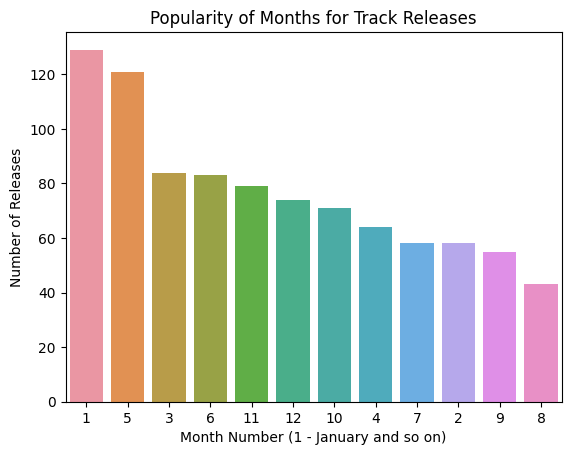

In [53]:
# Track releases by month

plt.figure()
sns.countplot(x='released_month', data=df, order=df['released_month'].value_counts().index)
plt.title('Popularity of Months for Track Releases')
plt.xlabel('Month Number (1 - January and so on)')
plt.ylabel('Number of Releases')

Text(0, 0.5, 'Danceability')

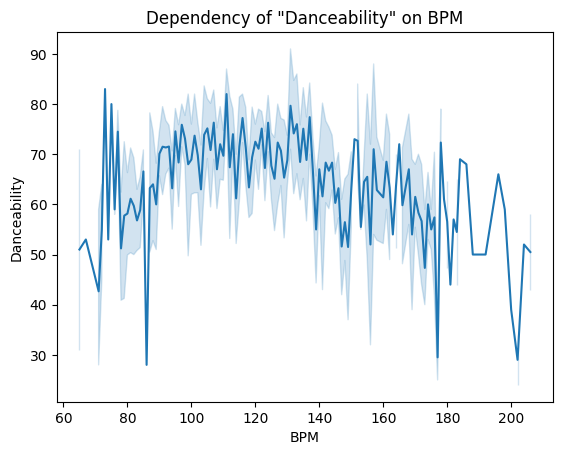

In [54]:
# Dependency of danceability on BPM
df_bpm_sorted = df.sort_values(by='bpm', ascending=False)

plt.figure()

sns.lineplot(x='bpm', y='danceability_%', data=df_bpm_sorted)
plt.title('Dependency of "Danceability" on BPM')
plt.xlabel('BPM')
plt.ylabel('Danceability')

# Classification

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import numpy as np

In [56]:
df['hit_track'] = np.nan

conditions = [
    (df['in_spotify_playlists'] > 25000),
    (df['in_spotify_playlists'] > 10000) & (df['in_spotify_playlists'] <= 25000),
    (df['in_spotify_playlists'] > 1000)  & (df['in_spotify_playlists'] <= 10000),
    (df['in_spotify_playlists'] >= 0)    | (df['in_spotify_playlists'] <= 1000)
             ]
values = ['100%', '66%', '33%', '0%']
df['hit_track'] = np.select(conditions, values)
df['hit_track'] = df['hit_track'].astype('category')

In [57]:
df[['track_name','in_spotify_playlists', 'hit_track']].sample(10)

,track_name,in_spotify_playlists,hit_track
535,drivers license,12685,66%
791,Dua Lipa,1992,33%
825,Flowers,801,0%
314,Midnight Rain,2612,33%
409,Eu Gosto Assim - Ao Vivo,1473,33%
910,The Scientist,30992,100%
946,Broke Boys,1060,33%
214,All The Way Live (Spider-Man: Across the Spide...,259,0%
790,Callaita,9539,33%
144,QUEMA,437,0%


In [58]:
X = df[['in_spotify_playlists', 'released_year', 'in_apple_playlists', 'in_deezer_playlists']]
Y = df['hit_track']

In [59]:
X.sample(5)

,in_spotify_playlists,released_year,in_apple_playlists,in_deezer_playlists
551,6734,2020,47,90
20,332,2023,11,10
253,6330,2022,109,158
597,4846,2021,54,259
630,51979,2003,306,5063


In [60]:
Y.sample(5)

199    100%
364      0%
227     33%
152     66%
0        0%
Name: hit_track, dtype: category
Categories (4, object): ['0%', '100%', '33%', '66%']

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=152)

In [62]:
print(X_train)

     in_spotify_playlists  released_year  in_apple_playlists  \
459                  7930           1952                 108   
348                  1168           2023                  45   
768                  2575           2022                   4   
795                   802           2022                  16   
443                 14994           1958                 191   
..                    ...            ...                 ...   
856                 10211           2018                  38   
521                   811           2022                   1   
412                  3045           2015                  43   
204                   178           2023                   6   
760                   181           2022                  16   

     in_deezer_playlists  
459                   73  
348                   20  
768                   12  
795                   23  
443                  206  
..                   ...  
856                   65  
521            

In [63]:
print(X_test)

     in_spotify_playlists  released_year  in_apple_playlists  \
139                  2335           2022                  82   
717                 40112           1975                 321   
785                  2308           2022                   7   
410                 13315           2021                 300   
689                  2578           2019                   8   
..                    ...            ...                 ...   
919                   766           2022                  16   
654                  4049           2022                 119   
128                 15032           2017                 221   
597                  4846           2021                  54   
637                  1801           2021                  77   

     in_deezer_playlists  
139                   50  
717                 5691  
785                    7  
410                  690  
689                   66  
..                   ...  
919                    9  
654            

In [64]:
dtree_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier(n_neighbors = 5)

In [65]:
dtree_model.fit(X_train, Y_train)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [66]:
dtree_pred = dtree_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

In [67]:
print(accuracy_score(dtree_pred, Y_test))
print(accuracy_score(knn_pred, Y_test))

0.9945652173913043
0.9945652173913043


In [68]:
print('Decision Tree')
print(classification_report(dtree_pred, Y_test))

print('k-means')
print(classification_report(knn_pred, Y_test))

Decision Tree
              precision    recall  f1-score   support

          0%       1.00      1.00      1.00        54
        100%       1.00      1.00      1.00         8
         33%       0.99      1.00      1.00       104
         66%       1.00      0.94      0.97        18

    accuracy                           0.99       184
   macro avg       1.00      0.99      0.99       184
weighted avg       0.99      0.99      0.99       184

k-means
              precision    recall  f1-score   support

          0%       1.00      1.00      1.00        54
        100%       1.00      1.00      1.00         8
         33%       0.99      1.00      1.00       104
         66%       1.00      0.94      0.97        18

    accuracy                           0.99       184
   macro avg       1.00      0.99      0.99       184
weighted avg       0.99      0.99      0.99       184



# Clustering

In [69]:
from sklearn.cluster import KMeans
from sklearn.cluster import Birch

In [70]:
X = df[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']]
Y = df['hit_track']

Text(0.5, 0, 'Deezer')

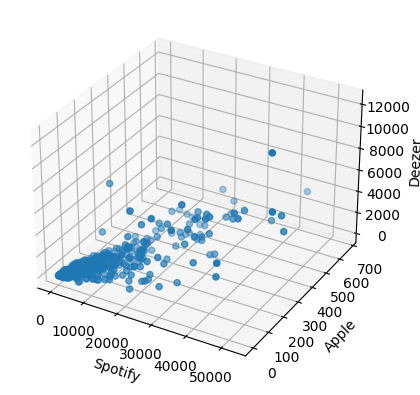

In [71]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.scatter(X['in_spotify_playlists'], X['in_apple_playlists'], X['in_deezer_playlists'])
ax.set_xlabel('Spotify')
ax.set_ylabel('Apple')
ax.set_zlabel('Deezer')

In [72]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [73]:
print(kmeans.cluster_centers_)

[[ 3024.3787696     51.3787696    118.32569361]
 [25908.34444444   222.13333333  2929.95555556]]


In [74]:
def show_clusters(series, labels, centers, axes_labels):
    fig = plt.figure()
    ax = fig.add_subplot(projection = '3d')

    ax.scatter(*series, c = labels, cmap = 'rainbow')
    if centers:
        ax.scatter(*centers, color='black')

    ax.set_xlabel(axes_labels[0])
    ax.set_ylabel(axes_labels[1])
    ax.set_zlabel(axes_labels[2])

In [75]:
def clusters_count(labels):
    return len(set(labels))

2


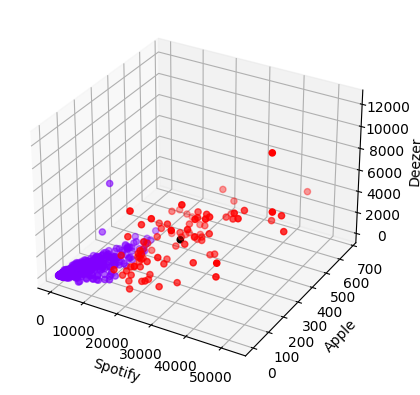

In [76]:
show_clusters(series=[X['in_spotify_playlists'], X['in_apple_playlists'], X['in_deezer_playlists']],
             labels=kmeans.labels_,
             centers=[kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2]],
             axes_labels=['Spotify', 'Apple', 'Deezer'],)

print(clusters_count(kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3


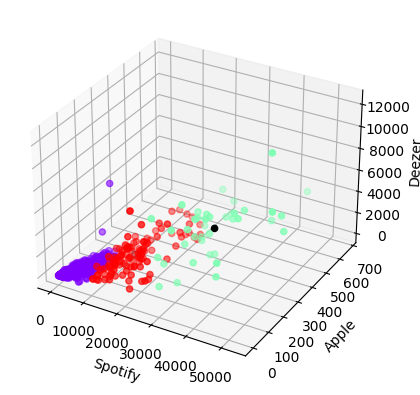

In [77]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

show_clusters(series=[X['in_spotify_playlists'], X['in_apple_playlists'], X['in_deezer_playlists']],
             labels=kmeans.labels_,
             centers=[kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2]],
             axes_labels=['Spotify', 'Apple', 'Deezer'],)

print(clusters_count(kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4


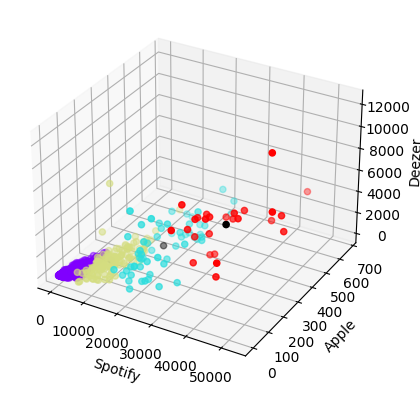

In [78]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

show_clusters(series=[X['in_spotify_playlists'], X['in_apple_playlists'], X['in_deezer_playlists']],
             labels=kmeans.labels_,
             centers=[kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2]],
             axes_labels=['Spotify', 'Apple', 'Deezer'],)

print(clusters_count(kmeans.labels_))

# Simple and Multiple Linear Regression

# Simple Linear Regression

In [79]:
import statsmodels.api as sm

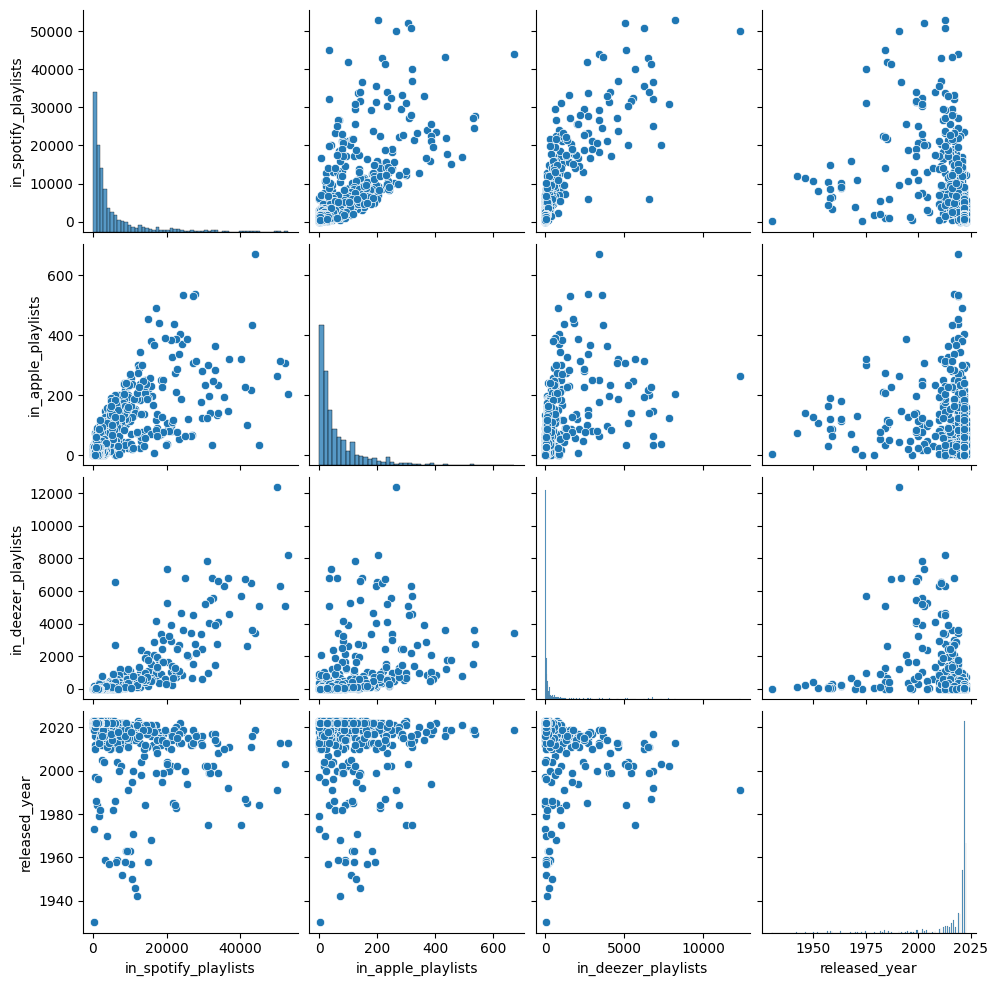

In [80]:
df_pairs = df[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'released_year']]
sns.pairplot(df_pairs)

Text(0, 0.5, 'Deezer')

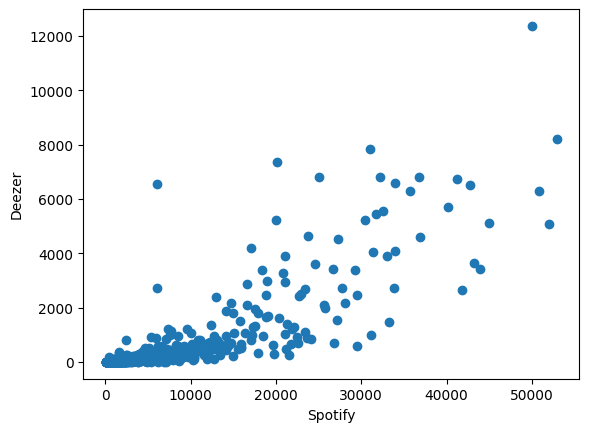

In [81]:
plt.scatter(df['in_spotify_playlists'], df['in_deezer_playlists'])
plt.xlabel('Spotify')
plt.ylabel('Deezer')

In [82]:
y = df['in_deezer_playlists']
x = df['in_spotify_playlists']
x = sm.add_constant(x)

ols_model = sm.OLS(y, x)
ols_results = ols_model.fit()

print(ols_results.summary())

                             OLS Regression Results                            
Dep. Variable:     in_deezer_playlists   R-squared:                       0.685
Model:                             OLS   Adj. R-squared:                  0.685
Method:                  Least Squares   F-statistic:                     1998.
Date:                 Sat, 30 Dec 2023   Prob (F-statistic):          1.67e-232
Time:                         17:43:16   Log-Likelihood:                -7248.6
No. Observations:                  919   AIC:                         1.450e+04
Df Residuals:                      917   BIC:                         1.451e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

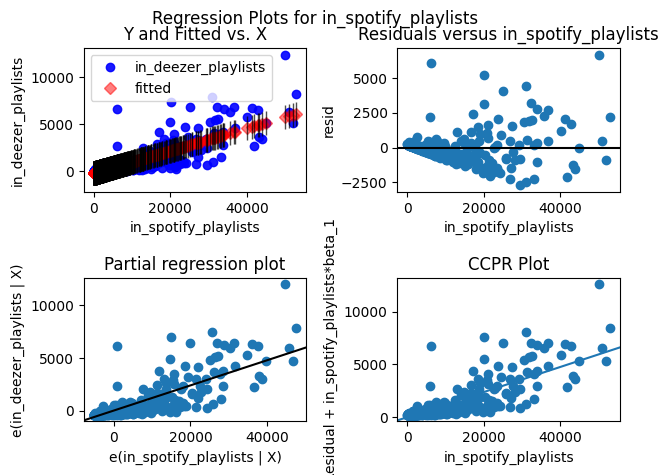

In [83]:
fig = plt.figure()
fig = sm.graphics.plot_regress_exog(ols_results, 'in_spotify_playlists', fig = fig)

Correlation Analysis

In [103]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

                      artist_count  released_year  released_month  \
artist_count              1.000000       0.084508        0.035096   
released_year             0.084508       1.000000        0.076323   
released_month            0.035096       0.076323        1.000000   
released_day             -0.026530       0.170778        0.075662   
in_spotify_playlists     -0.097229      -0.395977       -0.108898   
in_spotify_charts        -0.018915       0.069238       -0.049425   
streams                  -0.131327      -0.228392       -0.026220   
in_apple_playlists       -0.043504      -0.206023        0.001418   
in_apple_charts          -0.083628      -0.040305       -0.019028   
in_deezer_playlists      -0.069954      -0.309757       -0.090513   
in_deezer_charts          0.005170       0.093173       -0.005503   
bpm                      -0.034303      -0.009769       -0.040152   
danceability_%            0.198444       0.182309       -0.048719   
valence_%                 0.126121

<ipython-input-103-472ebb0302a3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Visualization

Visualize the correlations using a heatmap

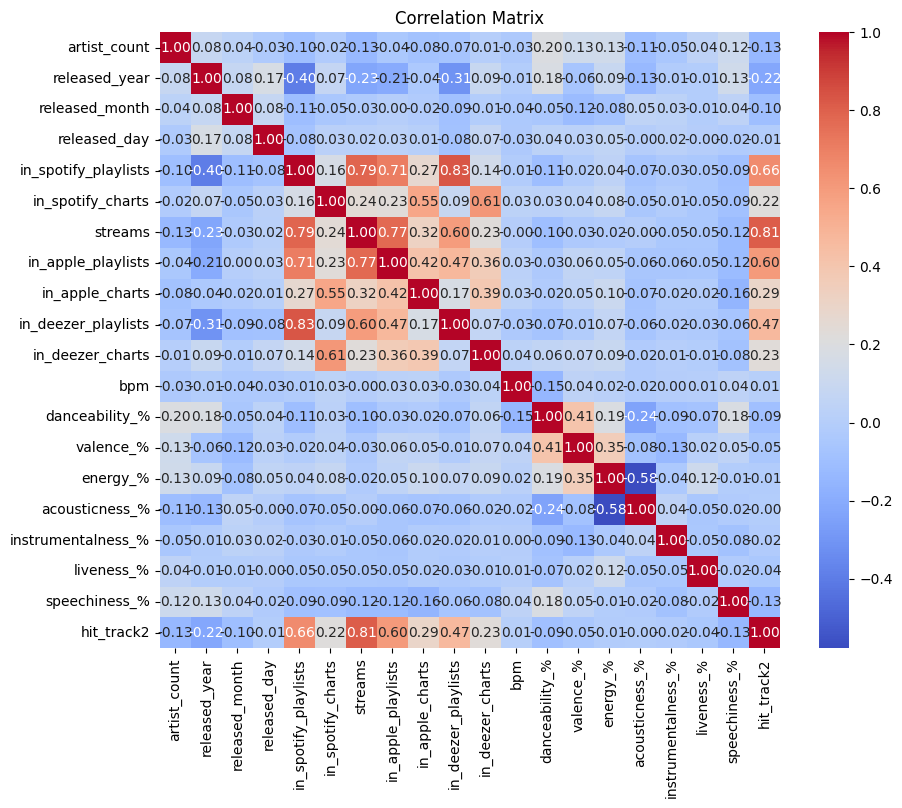

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

By visualizing this,we can see that there is a strong correlation between in_spotify_playlists and in_deezer_playlists ,streams and hit_track2

<ipython-input-106-a6acb949ab5d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


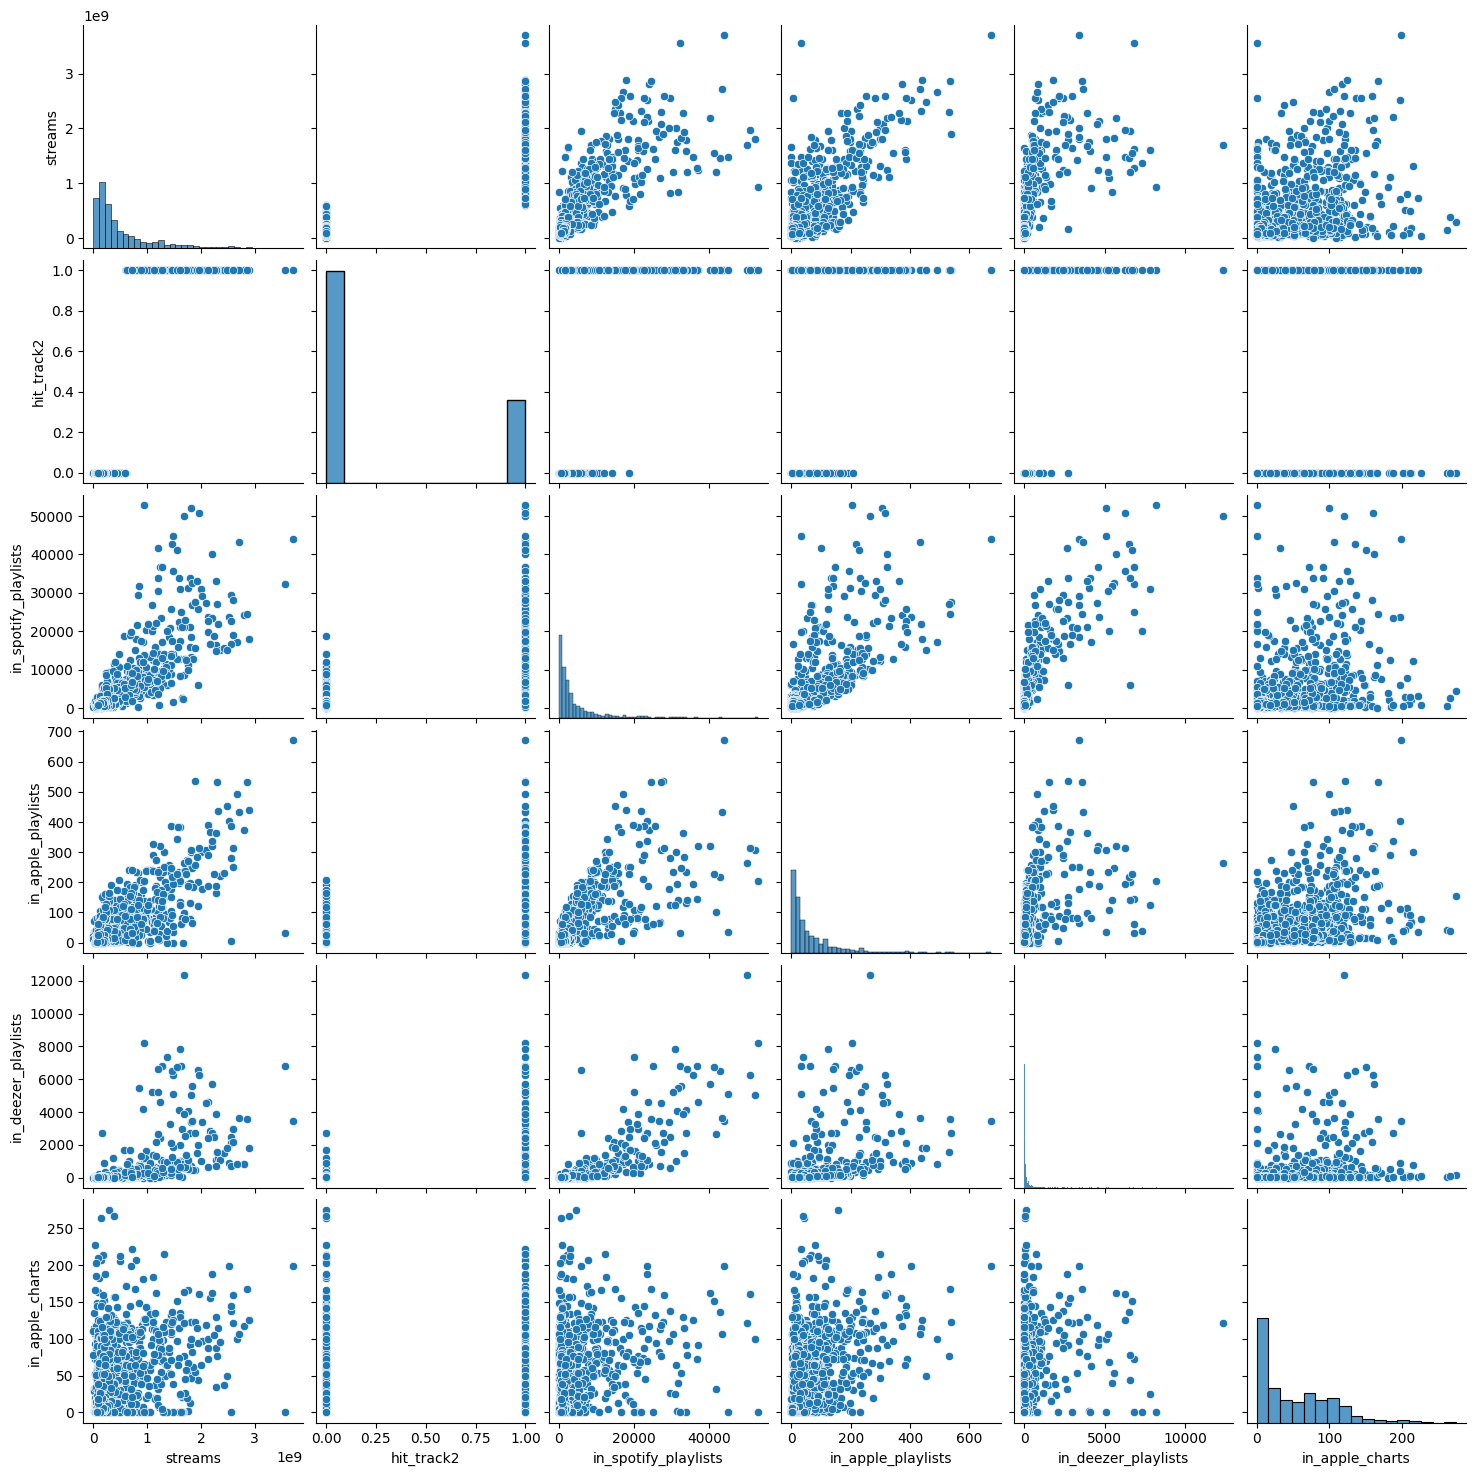

In [106]:
# Compute the correlation matrix
correlation_matrix = df.corr()
# Extract correlations with 'streams'
streaming_correlations = correlation_matrix['streams']

# Sort correlations by magnitude
sorted_correlations = streaming_correlations.abs().sort_values(ascending=False)
import seaborn as sns
import matplotlib.pyplot as plt

# Select the top N correlated attributes (e.g., top 5)
top_attributes = sorted_correlations.head(6).index  # Adjust the number as needed

# Create a pairplot for the top correlated attributes
sns.pairplot(df[top_attributes])
plt.show()


In [108]:

from scipy.stats import pearsonr

In [112]:
# Calculating correlation coefficient and p-value for 'streams'
corr_coeff, p_value = pearsonr(df['streams'], df['streams'])
print(f"Correlation Coefficient: {corr_coeff}, p-value: {p_value}")

Correlation Coefficient: 0.9999999999999999, p-value: 0.0


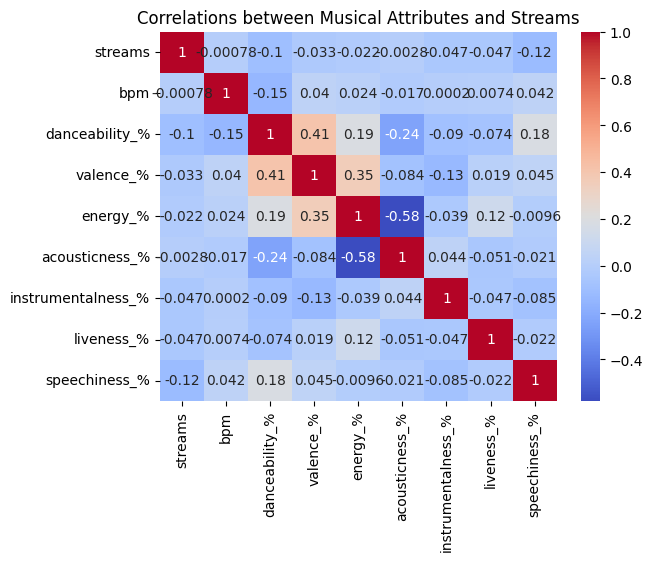

In [119]:
# Focus on relevant attributes
numerical_features = [
    "streams",
    "bpm",
    "danceability_%",
    "valence_%",
    "energy_%",
    "acousticness_%",
    "instrumentalness_%",
    "liveness_%",
    "speechiness_%",
]

# Explore correlations
correlations = df[numerical_features].corr()
sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.title("Correlations between Musical Attributes and Streams")
plt.show()

musical attributes  which are associated with songs that tend to receive higher
numbers of streams are dancebility and valence

3. Are there specific genres or artist counts that have shown a strong influence on the
streaming success of songs in 2023?

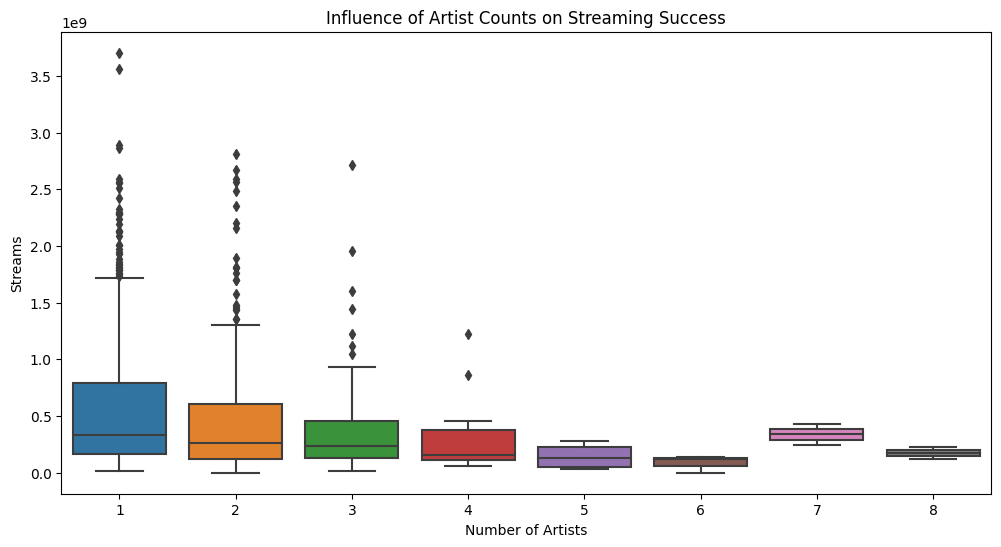

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Explore the influence of artist counts on streaming success
plt.figure(figsize=(12, 6))
sns.boxplot(x='artist_count', y='streams', data=df)
plt.title('Influence of Artist Counts on Streaming Success')
plt.xlabel('Number of Artists')
plt.ylabel('Streams')
plt.show()

Hence the single artists have highest streams compared to other artists.

4. Is there a particular time of the year (release month or day) that appears to be more
favorable for launching songs to achieve better streaming results?

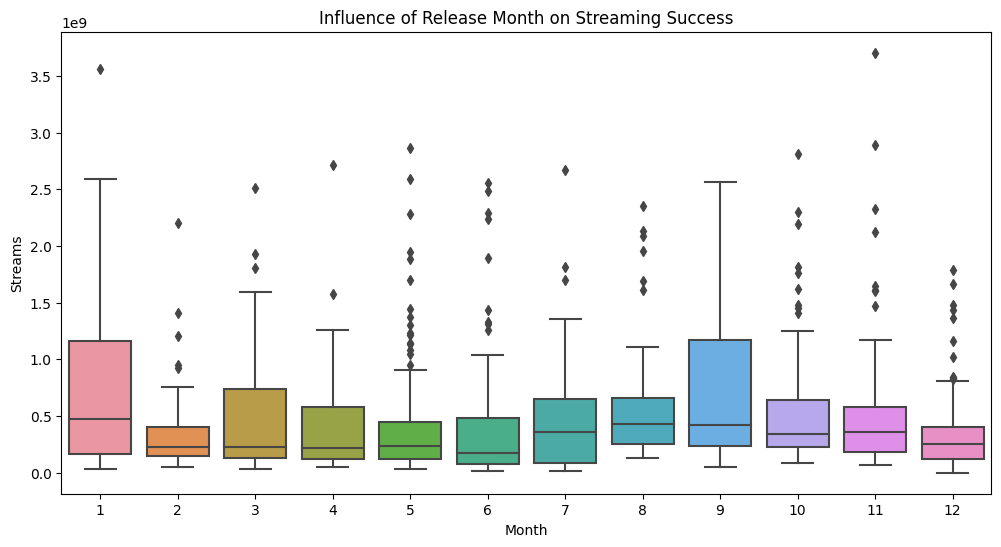

In [128]:
# Exploring the influence of release month on streaming success
plt.figure(figsize=(12, 6))
sns.boxplot(x='released_month', y='streams', data=df, order=range(1, 13))
plt.title('Influence of Release Month on Streaming Success')
plt.xlabel('Month')
plt.ylabel('Streams')
plt.show()

Average stream is highest in January. But "most streamed song" is released in November.

5. Build a machine learning model to predict the number of streams a song receives in a *year*

# Prediction Using Neural Network

In [87]:
df['streams'].describe()

count    9.190000e+02
mean     5.194073e+08
std      5.726207e+08
min      2.762000e+03
25%      1.445750e+08
50%      2.917097e+08
75%      6.744228e+08
max      3.703895e+09
Name: streams, dtype: float64

In [88]:
df['hit_track2'] = np.nan

conditions = [(df['streams'] >= 6*(10**8)), (df['streams'] < 6*(10**8))]
values = [1, 0]

df['hit_track2'] = np.select(conditions, values)
df['hit_track2'] = df['hit_track2'].astype('int16')

In [89]:
df[['track_name','streams','hit_track2']].sample(5)

,track_name,streams,hit_track2
855,Crazy What Love Can Do,2.867395e+08,0
930,Casei Com a Putaria,1.877016e+08,0
581,Daddy Issues,1.127468e+09,1
393,Jhoome Jo Pathaan,1.365184e+06,0
1,LALA,1.337163e+08,0


In [90]:
X = df[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'streams']]
Y = df['hit_track2']

In [91]:
X.head(5)

,in_spotify_playlists,in_apple_playlists,in_deezer_playlists,streams
0,553,43,45,141381703.0
1,1474,48,58,133716286.0
2,1397,94,91,140003974.0
3,7858,116,125,800840817.0
4,3133,84,87,303236322.0


In [92]:
Y.head(5)

0    0
1    0
2    0
3    1
4    0
Name: hit_track2, dtype: int16

In [93]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [94]:
X_train, X_test_validate, Y_train, Y_test_validate = train_test_split(X, Y, test_size=0.30, random_state=152)
X_validate, X_test, Y_validate, Y_test = train_test_split(X_test_validate, Y_test_validate, test_size=0.5, random_state=152)

print(X_train.shape, Y_train.shape, X_validate.shape, Y_validate.shape, X_test.shape, Y_test.shape,)

(643, 4) (643,) (138, 4) (138,) (138, 4) (138,)


In [95]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(16, activation = 'relu', input_shape = (4,)),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

model.compile(optimizer = 'sgd',loss = 'binary_crossentropy', metrics = ['accuracy'])

In [96]:
history = model.fit(X_train, Y_train, batch_size = 32, epochs = 1000, validation_data = (X_validate, Y_validate))

Epoch 1/1000
21/21 [==============================] - 2s 46ms/step - loss: 0.6822 - accuracy: 0.7838 - val_loss: 0.6714 - val_accuracy: 0.7826
Epoch 2/1000
21/21 [==============================] - 0s 6ms/step - loss: 0.6664 - accuracy: 0.7325 - val_loss: 0.6530 - val_accuracy: 0.7536
Epoch 3/1000
21/21 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.7247 - val_loss: 0.6382 - val_accuracy: 0.7536
Epoch 4/1000
21/21 [==============================] - 0s 5ms/step - loss: 0.6382 - accuracy: 0.7247 - val_loss: 0.6259 - val_accuracy: 0.7464
Epoch 5/1000
21/21 [==============================] - 0s 6ms/step - loss: 0.6278 - accuracy: 0.7247 - val_loss: 0.6151 - val_accuracy: 0.7464
Epoch 6/1000
21/21 [==============================] - 0s 6ms/step - loss: 0.6188 - accuracy: 0.7247 - val_loss: 0.6056 - val_accuracy: 0.7464
Epoch 7/1000
21/21 [==============================] - 0s 6ms/step - loss: 0.6109 - accuracy: 0.7247 - val_loss: 0.5972 - val_accuracy: 0.7464
Epoch

In [97]:
model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.9928


[0.036091625690460205, 0.9927536249160767]

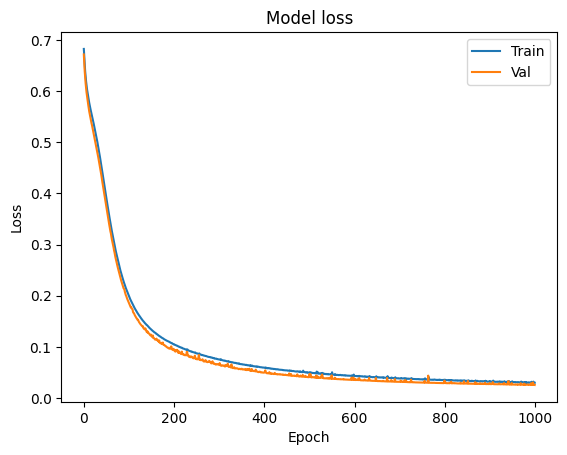

In [98]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

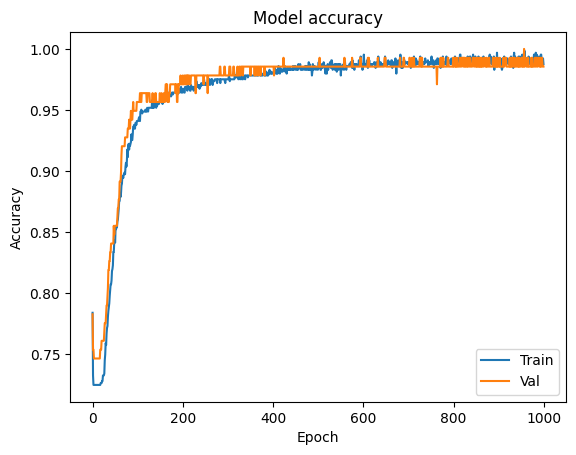

In [99]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [100]:
predictions = model.predict(X_test[:5])

1/1 [==============================] - 0s 98ms/step


In [101]:
X_test[:5]

array([[0.08965896, 0.10119048, 0.00606453, 0.14568256],
       [0.03313977, 0.03869048, 0.00121291, 0.11635724],
       [0.28374979, 0.32886905, 0.08716746, 0.63601124],
       [0.14752114, 0.13988095, 0.01220991, 0.21225754],
       [0.64060756, 0.34672619, 0.33112315, 0.430063  ]])

In [102]:
predictions

array([[0.1321122],
       [0.008466 ],
       [1.       ],
       [0.9902311],
       [1.       ]], dtype=float32)

Marketing Strategies:
Focus on collaborations and featured artists: The data shows that collaborations and featured artists often lead to higher streaming numbers. Spotify could promote collaborations between diverse artists from different genres to attract wider audiences.

Danceability and energy: can focus on creating music with high danceability and energy, as these attributes tend to correlate with higher streaming numbers. Consider incorporating elements of popular genres like pop, dance, and Latin.
Collaboration and diversity: Encourage collaborations between artists from different genres and backgrounds. This can attract wider audiences and create fresh and unexpected sounds.

Shorter song lengths: Consider producing shorter songs, as data suggests that listeners are more likely to stream shorter tracks all the way through.
Audio quality and mastering: Invest in high-quality production and mastering to ensure a polished and professional sound that translates well to streaming platforms.

Utilize audio features strategically: Pay attention to audio features like danceability, energy, and valence when producing music. Aim to create a balance of these features to cater to a wider audience.

